# ASSIGNMENT #3 - ATMOSPHERIC SOUNDINGS #
Due: 04 March 2023 @ 11:59p

Purpose:\
The purpose of this assignment is to continue to strengthen skills with reading in data and begin to familiarize with plotting data on standard plots, skew-t log-p diagrams and hodographs.

Overview:\
In this assignment you will read in atmospheric sounding data and plot that data using several methods.


| | UPDATE TO YOUR INFORMATION | 
| :- | :- |
| Created By | Jared W. Marquis |
| Creation Date | 17 January 2024 |
| Course | ATSC 270 - Computer Concepts in Meteorology |

In [1]:
### UPDATE TO YOUR INFORMATION ###
#information allowing anyone with the code to print the author and contact information
__author__    = "Jared W. Marquis & Deborah Hershey"
__contact__   = "jared.marquis@und.edu & deborah.hershey@und.edu"

### IMPORT REQUIRED LIBRARIES ###

In [19]:
import numpy as np
import metpy.calc as mpcalc
from metpy.units import units
from metpy.plots import Hodograph, SkewT
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

### OPEN SOUNDING CSV FILE ###
Open the CSV file you created last lab.  Make sure to copy it into this directory.

In [5]:
file = open("/home/deb/ATSC_270/assignment_2/KBIS_sounding.csv",'r').readlines()

### EXTRACT VARIABLES AND ADD UNITS ###
make sure winds are converted to knots

In [21]:
#grabs the first line which is the title of the data

data = pd.read_csv("/home/deb/ATSC_270/assignment_2/KBIS_sounding.csv",header=1)
#print(data)

#add units

#separating variables
pressure = data['pressure[mb]'].values
pressure = pressure*units('millibars')
height = data['height[m]'].values
height = height*units('meters')
temp = data['temperature[degC]'].values
temp = temp*units('degC')
dwp = data['dewpoint[degC]'].values
dwp = dwp*units('degC')

'''
u = data['u-wind[m/s]'].values
u = u*(units('meters')/units('seconds'))
u = u.to('knots')
v = data['v-wind[m/s]'].values
v = v*(units('meters')/units('seconds'))
v = v.to('knots')
'''

#assigning units
print(temp)

[-25.3 -24.1 -22.7 -22.9 -22.9 -21.3 -21.3 -22.5 -24.1 -23.1 -22.9 -23.3 -25.9 -34.3 -34.5 -34.5 -38.5 -38.7 -39.9 -54.7 -58.1 -58.3 -58.5 -57.7 -56.5 -56.7 -57.7 -57.5 -59.1 -59.7 -59.9 -58.7 -58.9 -59.5 -59.1 -62.5 -61.9 -62.7 -61.7 -61.5 -66.1 -65.9 -65.9 -69.3 -69.1 -68.1 -66.5 -67.9 -69.5 -69.5] degree_Celsius


### PLOT TEMPERATURE & DEWPOINT VS HEIGHT ###

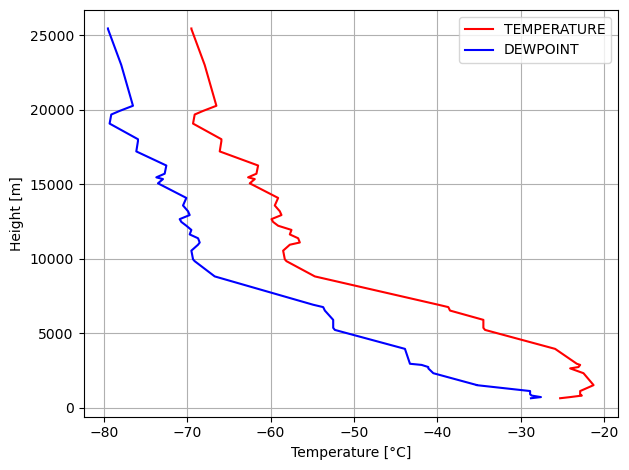

In [22]:
#create a figure
#create subplot

fig, ax = plt.subplots()

#plot temperature on the x-axis, height on the y-axis in red
#give it the label of TEMPERATURE
ax.plot(temp,height,c='red',label = "TEMPERATURE")
#plot dewpoint in blue
#give it the label of DEWPOINT
ax.plot(dwp,height,c='blue',label = 'DEWPOINT')
#add a background grid
ax.grid()
#add a x label with units (including the degree symbol) - google it and figure it out :)
#add a y label with units 
ax.set(xlabel = u'Temperature [\N{DEGREE SIGN}C]',ylabel = f'Height [m]')
#add a legend
ax.legend()
#this is added to make sure labels don't get cut off
fig.tight_layout()
#save the figure as temp_dwpt.png
plt.savefig('temp_dwpt.png',dpi=150)

While this is nice, it's not particularly useful to us for analyzing the current weather or making a forecast.

For that, we typically examine Skew-T Log-P diagrams.  For this, we will be following a modified version of the "Skew-T with Complex Layout" example on MetPy's website (https://unidata.github.io/MetPy/latest/examples/plots/Skew-T_Layout.html)

### PLOT DATA ON SKEW-T ###

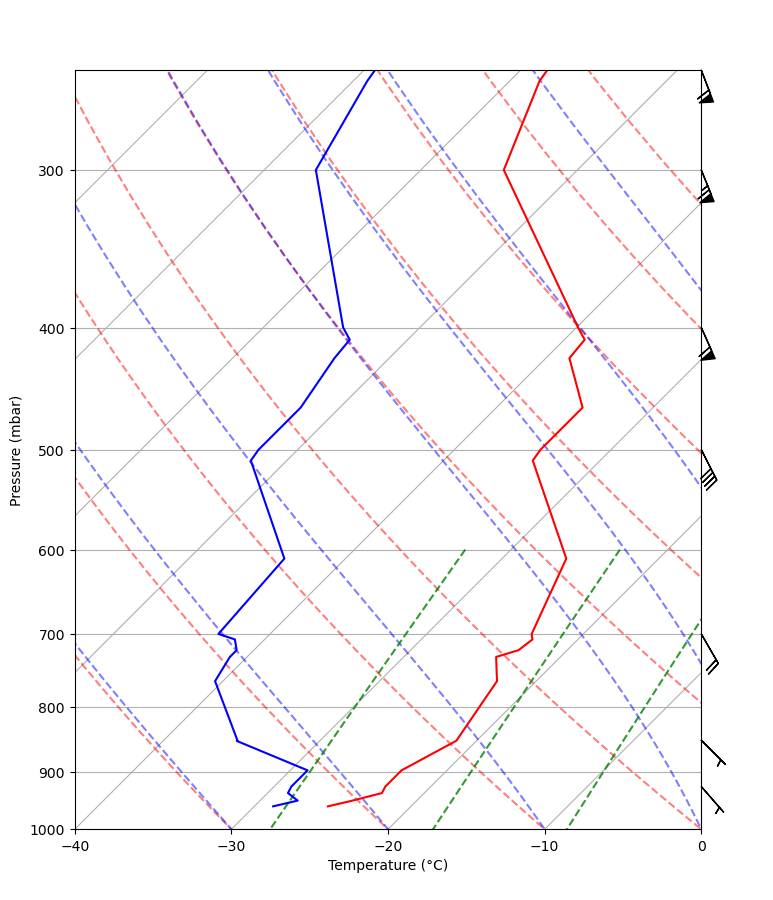

In [23]:
#create a figure and give it a figsize of 9x9, with a dpi of 100
fig = plt.figure(figsize = [9,9],dpi = 100)
#create Skew-T
skew = SkewT(fig,rotation=45)

#add dry adiabats
skew.plot_dry_adiabats()
#add moist adiabats
skew.plot_moist_adiabats()
#add mixing ratio lines
skew.plot_mixing_lines()

#add axis labels with units
skew.ax.set_xlabel(f'Temperature ({temp.units:~P})')
skew.ax.set_ylabel(f'Pressure ({pressure.units:~P})') 


#add temperature in red
skew.plot(pressure,temp,'r')
#add dewpoint in blue
skew.plot(pressure,dwp,'blue')

#plot wind barbs
skew.plot_barbs(pressure,u,v)

#set x-axis limits that look good (use your eyes)
skew.ax.set_xlim(-40,0)
#set y-axis limits that include the tropopause but not a ton of the stratosphere
skew.ax.set_ylim(1000,250)
#to make sure everything looks okay
fig.tight_layout()

#save the skew T as skewT.png
plt.savefig('skewT.png',dpi=150)

### PLOT HODOGRAPH ###
The plot will not look correct if you do not remove NaNs

In [26]:
#remove nans from u and v
'''
u = data['u-wind[m/s]'].values
u = u*(units('meters')/units('seconds'))
u = u.to('knots')
v = data['v-wind[m/s]'].values
v = v*(units('meters')/units('seconds'))
v = v.to('knots')
'''
u = data['u-wind[m/s]']
v = data['v-wind[m/s]']

u_hodo = u.dropna()
v_hodo = v.dropna()

u_hodo = u_hodo.values
u_hodo = u_hodo*(units('meters')/units('seconds'))
u_hodo = u_hodo.to('knots')

v_hodo = v_hodo.values
v_hodo = v_hodo*(units('meters')/units('seconds'))
v_hodo = v_hodo.to('knots')

print(v_hodo)
#create the hodograph (have the range from 0-100kts with 25kt increment)
#make the wind curve black
#hodo = Hodograph(component_range=100)
#hodo.add_grid(increment=25)

#add x and y labels
#hodo.ax.set(xlabel = f'Windspeed E/W ({u.units:~P})', ylabel = f'Windspeed N/S ({v.units:~P})')
#to make sure everything looks okay
#fig.tight_layout()

#save figure as hodo.png


[4.52915766738661 7.075593952483802 31.1792656587473 65.04103671706264 102.32397408207345 115.89200863930886 109.22462203023758 91.78833693304536 93.65442764578835 81.00000000000001 87.92008639308855 96.22030237580994 99.6025917926566 94.14038876889849] knot


### PLOT SKEW-T & HODOGRAPH ON SAME FIGURE ###

In [ ]:
fig = plt.figure(figsize=(9,9),dpi=100)

gs = gridspec.GridSpec(3,3)
skew = SkewT(fig, rotation=45, subplot=gs[:,:2])

#add dry adiabats

#add moist adiabats

#add mixing ratio lines


#add axis labels with units

#add a y label with units 


#add temperature in red

#add dewpoint in blue


#plot wind barbs


#set x-axis limits that look good (use your eyes)

#set y-axis limits that include the tropopause but not a ton of the stratosphere

#add a hodograph
ax = fig.add_subplot(gs[0,-1])

#add x and y labels

#add a title with the date and launch location:
plt.suptitle(title)

#to make sure everything looks okay
fig.tight_layout()

#save the figure as skew_hodo.png
